In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
plt.style.use("seaborn-darkgrid")

## Data Preparation

In [44]:
 # There is prepeared two set of data which is matrix containg 500 rows and 2 features
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])



# Normal Distribution
dist_01=np.random.multivariate_normal(mean_01,cov_01,800)
dist_02=np.random.multivariate_normal(mean_02,cov_02,800)
x_train=dist_01
y_train=dist_02
x_test=dist_01[:dist_01.shape[0],-1]
y_test=dist_02[:dist_02.shape[0],-1]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(800, 2) (800, 2)
(800,) (800,)


## Data Visualization

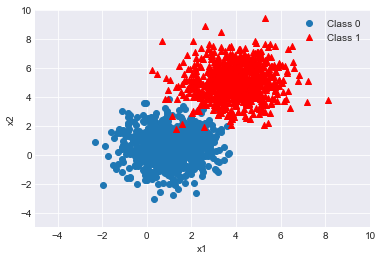

In [45]:
plt.figure(0)
plt.scatter(x_train[:,0],x_train[:,1],label="Class 0")
plt.scatter(y_train[:,0],y_train[:,1],color="red",label="Class 1",marker='^')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [46]:
# So use Gradient Descent to minimize loss and loss is -ve of log likilihood (01x1+02x2+.....) 

## Logistic Regression Functions

In [59]:
def hypothesis(x,w,b):
    '''accept input vector x,weight vector w,bias b'''
    h=np.dot(x,w)+b;
    return sigmoid(h)
def sigmoid(z):
    return (1.0/(1.0+np.exp(-1.0*z)))
def error(y_true,x,w,b):
            m=x.shape[0]
            err=0.0
            for i in range(m):
                hx=hypothesis(x[i],w,b)
                err +=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
                  
            return err/m # this is the avg error
def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w=-1.0*(y_true[i]-hx)*x[i]
        grad_b=-1.0*(y_true[i]-hx)
    grad_b/=m
    grad_w/=m
    return [grad_b,grad_w]
def gradient_descent(x,y_true,w,b,learning_rate=0.1):
    err=error(y_true,x,w,b)
    [grad_b,grad_w]=get_grads(y_true,x,w,b)
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    return err,w,b
def prediction(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence>.5:
        return 1
    else:
        return 0;
def get_acc(x_test,y_test,w,b):
    y_predict=[]
    for i in range(y_test.shape[0]):
        y=prediction(x_test[i],w,b)
        y_predict.append(y)
    y_predict=np.array(y_predict)
    return float((y_predict==y_test).sum())/y_test.shape[0]# compare how many data match ex=1000,0110 compare pairwise if match 1 otherwise 0 and sum it,
                                     # if divide length (4) then it is the accureacy

In [80]:
loss=[]
acc=[]
W=np.random.random(x_train.shape[1])
b=np.random.random()
b

0.21728320268094836

In [75]:
for i in range(10):
    l,W,b=gradient_descent(x_train,y_train,W,b,learning_rate=0.5)
   # acc1=get_acc(x_test,y_test,w,b)  # x_test ,and y_test is the data
    #acc.append(acc1)
    loss.append(l)

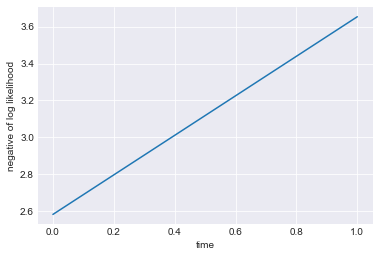

[2.58180385 3.653747  ]


In [76]:
plt.plot(l)# this is not a proper data
plt.ylabel("negative of log likelihood")
plt.xlabel("time")
plt.show()
print(l)

In [77]:
w

array([0.45785375, 0.13875754])

## decision boundary

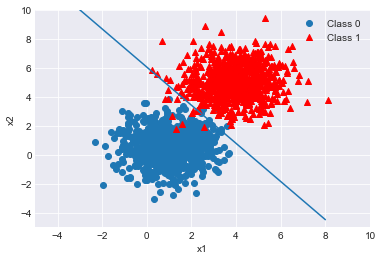

In [100]:
plt.figure(0)
plt.scatter(x_train[:,0],x_train[:,1],label="Class 0")
plt.scatter(y_train[:,0],y_train[:,1],color="red",label="Class 1",marker='^')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
x=np.linspace(-4,8,10)
y=-(.50*x-2.3)/.38   #y=-(w[0]*x+b)/w[1] for two class
plt.plot(x,y)
plt.show()

In [101]:
print(W,b)

[0.9615703  0.84757745] 0.21728320268094836
